In [1]:
from sklearn.datasets import fetch_openml
data = fetch_openml("teachingAssistant")
df = data.frame

In [2]:
data.details

{'id': '1115',
 'name': 'teachingAssistant',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-07T00:41:51',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53998/teachingAssistant.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset1115/dataset_1115.pq',
 'file_id': '53998',
 'default_target_attribute': 'class',
 'tag': ['study_1',
  'study_123',
  'study_41',
  'study_52',
  'study_7',
  'study_88'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset1115/dataset_1115.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:42:47',
 'md5_checksum': 'ccf0b5a5883fef328fbd373d35669bbb'}

In [3]:
df

,ID,EnglishSepaker,courseInstructor,course,summer,classSize,class
0,1.0,1,23,3,1,19.0,3
1,2.0,2,15,3,1,17.0,3
2,3.0,1,23,3,2,49.0,3
3,4.0,1,5,2,2,33.0,3
4,5.0,2,7,11,2,55.0,3
...,...,...,...,...,...,...,...
146,147.0,2,3,2,2,26.0,1
147,148.0,2,10,3,2,12.0,1
148,149.0,1,18,7,2,48.0,1
149,150.0,2,22,1,2,51.0,1


In [4]:
import tabpfn

/anaconda/envs/tabpfn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [6]:

cross_validate(RandomForestClassifier(), df[['ID']], df['class'], scoring="roc_auc_ovr", cv=StratifiedKFold(shuffle=True))

{'fit_time': array([0.08794737, 0.08904672, 0.08000946, 0.0799768 , 0.07983041]),
 'score_time': array([0.01371765, 0.00923705, 0.00924063, 0.00946903, 0.00919175]),
 'test_score': array([0.9984127 , 1.        , 0.98833333, 0.99666667, 0.98916667])}

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['ID']], df['class'])

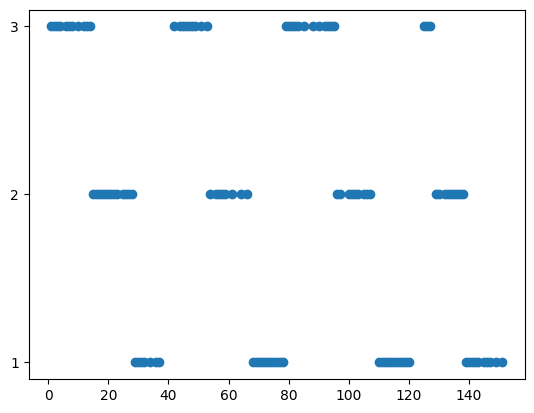

In [8]:
import matplotlib.pyplot as plt
plt.plot(X_train['ID'], y_train, 'o')

In [10]:
RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

In [11]:
from tabpfn.scripts.distill_mlp import TorchMLP
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ss = StandardScaler()
torch.set_num_threads(1)

mlp = TorchMLP(device="cpu", verbose=10, n_epochs=500, learning_rate=0.0026, n_layers=3, dropout_rate=0, weight_decay=2e-5, hidden_size=256, )
mlp = make_pipeline(ss, mlp)
#mlp.fit(np.array(X_train)), np.array(y_train)

In [12]:
cross_validate(mlp, df[['ID']], df['class'], scoring="roc_auc_ovr", cv=StratifiedKFold(shuffle=True))

epoch: 0  loss: 1.103437  [  120/  120]
epoch: 10  loss: 0.970876  [  120/  120]
epoch: 20  loss: 0.874193  [  120/  120]
epoch: 30  loss: 0.742419  [  120/  120]
epoch: 40  loss: 0.644905  [  120/  120]
epoch: 50  loss: 0.488930  [  120/  120]
epoch: 60  loss: 0.372187  [  120/  120]
epoch: 70  loss: 0.279951  [  120/  120]
epoch: 80  loss: 0.186486  [  120/  120]
epoch: 90  loss: 0.150953  [  120/  120]
epoch: 100  loss: 0.116095  [  120/  120]
epoch: 110  loss: 0.090666  [  120/  120]
epoch: 120  loss: 0.077387  [  120/  120]
epoch: 130  loss: 0.066156  [  120/  120]
epoch: 140  loss: 0.057564  [  120/  120]
epoch: 150  loss: 0.052474  [  120/  120]
epoch: 160  loss: 0.113631  [  120/  120]
epoch: 170  loss: 0.059607  [  120/  120]
epoch: 180  loss: 0.045393  [  120/  120]
epoch: 190  loss: 0.039018  [  120/  120]
epoch: 200  loss: 0.035464  [  120/  120]
epoch: 210  loss: 0.033159  [  120/  120]
epoch: 220  loss: 0.031015  [  120/  120]
epoch: 230  loss: 0.029075  [  120/  120]
epo

{'fit_time': array([1.55418301, 1.56656456, 1.58683157, 1.5886507 , 1.58911562]),
 'score_time': array([0.00511551, 0.00471425, 0.0049262 , 0.00490665, 0.00365758]),
 'test_score': array([0.98434343, 0.99154443, 0.99833333, 0.995     , 1.        ])}

Bad pipe message: %s [b'\xf7\x02gkT_\xaeo`\x06\x9c\x13\x91c\x81K;\xc2 \x1d\x96\xedZ\xf1\x1e?\xa41\x06\x817\xefX\x86@c(\xf4\xf2\xc3\xbb5FI*7\xd2v\xc0#*\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00']
Bad pipe message: %s [b'']
Bad pipe message: %s [b"\xf5\x13g:\xf3\x9b;g\x9e\x1a\xaaS\xc6X\x8fk~\xf3\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00"]
Bad pipe message: %s [b'\xce\xa8%o\xdfCH\xef"-\x0b\x828\x81\xe4A\x00\r\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\

In [67]:
y_pred = mlp.predict(ss.transform(np.arange(1, 150).reshape(-1, 1)))

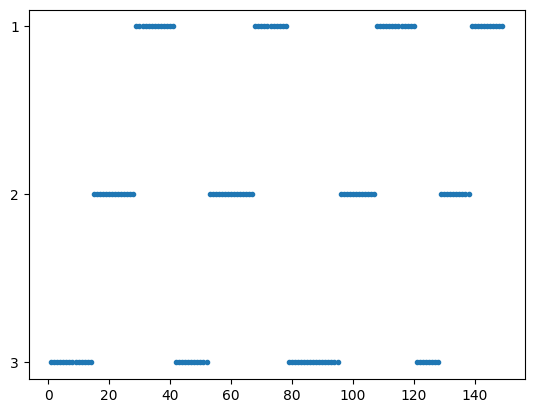

In [68]:
plt.plot(np.arange(1, 150), y_pred, '.')

In [69]:
mlp.score(ss.transform(np.array(X_test)), np.array(y_test))

0.8947368421052632

In [80]:

from sklearn.neural_network import MLPClassifier
cross_validate(MLPClassifier(max_iter=1000), df[['ID']], df['class'], scoring="roc_auc_ovr", cv=StratifiedKFold(shuffle=True))

{'fit_time': array([ 2.17620206, 49.82601023, 28.03628302,  1.09983492, 26.61671162]),
 'score_time': array([0.00947595, 0.05743575, 0.02425075, 0.05313778, 0.02742648]),
 'test_score': array([0.52662338, 0.82574998, 0.53666667, 0.56      , 0.59333333])}

In [11]:
rf = RandomForestClassifier().fit(df.drop(columns=['class']), df['class'])

In [13]:
rf.feature_importances_

array([0.38945766, 0.05512015, 0.14804687, 0.17688677, 0.03810861,
       0.19237994])

In [ ]:
cross_validate((), df.drop(columns=['class']), df['class'], scoring="roc_auc_ovr", cv=StratifiedKFold(shuffle=True))

In [16]:
import openml
did = 1115
dataset = openml.datasets.get_dataset(did)
X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute
    )

In [17]:
dataset.ignore_attribute

<AxesSubplot:xlabel='ID'>

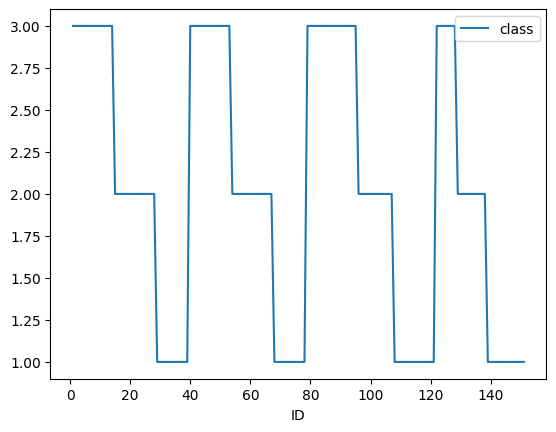

In [21]:
df.astype(int).plot(x="ID", y="class")

In [68]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False).fit(X[['ID']])

,ID,EnglishSepaker,courseInstructor,course,summer,classSize
0,1,1,23,3,1,19
1,2,2,15,3,1,17
2,3,1,23,3,2,49
3,4,1,5,2,2,33
4,5,2,7,11,2,55
...,...,...,...,...,...,...
146,147,2,3,2,2,26
147,148,2,10,3,2,12
148,149,1,18,7,2,48
149,150,2,22,1,2,51
